<a href="https://colab.research.google.com/github/j21j/CAP4630/blob/main/HW5/CAP4630_HW5_Jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

## Jia Jones HW 5 CAP 4630

In this homework assignment, we will train an AI-based explorer to play a game by reinforcement learing. As domestrated below, in this game, the treasure (denoted by T) is on the right-most and the explorer (denoted by o) will learn to get the treasure by moving left and right. The explorer will be rewarded when it gets the treasure.  After serveral epoches, the explorer will learn how to get the treasure faster and finally it will go to the treasure by moving to right directly. \

You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 80 points, with extra 10 bonus points)** \

Episode 1, Step1: o----T   \
... \
Episode 1, Step6: ---o-T   \
... \
Episode 1, Step10: -o---T \
... \
Episode 1, Step15: ----oT (finished) \

**Task Overview:**
- Train the explorer getting the treasure quickly through Q-learning method

## 1 Achieve Q-learning method ##
### 1.1 Model Preparation **(5 Points)**

Import useful packages and prepare hyperpaprameters for Q-learning methods.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the library "time"
4. Set the parameter as suggested

**Hints:**
1. For your first trial, you may set as it is
2. You may explore other possibilities here when you complete the whole homework

In [17]:
#import packages here
import numpy as np
import pandas as pd
import time

N_STATES = 6   # the width of 1-dim world
ACTIONS = ['left', 'right']     # the available actions to use
EPSILON = 0.9   # the degree of greedy (0＜ε＜1)
ALPHA = 0.1     # learning rate (0＜α≤1)
GAMMA = 0.9    # discount factor (0＜γ＜1)
MAX_EPOCHES = 13   # the max epoches
FRESH_TIME = 0.3    # the interval time

### 1.2 Q table **(10 Points)**

Q table is a [states * actions] matrix, which stores Q-value of taking one action in that specific state. For example, the following Q table means in state s3, it is more likely to choose a1 because it's Q-value is 5.31 which is higher than Q-value 2.33 for a0 in s3(refer to Lecture slides 16, page 35).
![](https://drive.google.com/uc?export=view&id=1WGh7NYyYw6ccrxbDVdfbJmb_IhBfUyFf)

**Tasks:**
1. Define the build_q_table function
2. **Print Out** defined Q-table. The correct print information should be:

|     | left | right |
|-----|------|-------|
| 0   | 0.0  | 0.0   |
| 1   | 0.0  | 0.0   |
| 2   | 0.0  | 0.0   |
| 3   | 0.0  | 0.0   |
| 4   | 0.0  | 0.0   |
| 5   | 0.0  | 0.0   |


    

**Hints:**
1. Using pd.DataFrame to define the Q-table.(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
2. Initialize the Q-table with all zeros.

In [18]:
#define the function here
def build_q_table(n_states, actions):
  table = pd.DataFrame(
    np.zeros((n_states, len(actions))),  # initialize with zeros
    columns=actions  # set column names as actions
  )
  return table

q_table = build_q_table(N_STATES, ACTIONS)
print(q_table)

   left  right
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0
5   0.0    0.0


### 1.3 Define action **(15 Points)**

In this section, we are going to define how an actor picks the actions. We introduce ε-greedy (In lecture slide 16, page 35). In the initial exploring stage, the explorer knows little about the environment. Therefore, it is better to explore randomly instead of greedy. ε-greedy is the value to control the degree of greedy. It can be changed with time lapsing. In this homework, we set it as fixed value EPSILON = 0.9. You can change it to explore the final effect.

**Tasks:**
1. Define the choose_action function
2. **Print Out** sample action. The sampled action should be "left" or "right".

**Hints:**
1. You need to define two cases: 1) non-greedy (i.e., random); 2) greedy.
2. Non-greedy should occupy (1-ε) senario while greedy should occupy ε senario. In this case, it means Non-greedy occupys 10% senario while greedy occupys 90% senario. (you could implement it by comparing a random number ranging from 0 to 1 with ε. **Numpy provides a function capable of generating a random number from a uniform distribution.**)
3. In the non-greedy pattern, the actor should choose the actions randomly.
4. In the greedy pattern, the actor should choose the higher Q-value action.
5. Don't forget the initial state which means all Q-value are zero and actor cannot choose greedily. You can treat it as non-greedy pattern.

In [19]:
#define the function here
# Given state and Q-table, choose action
def choose_action(state, q_table):
  # pick all actions from this state
  if np.random.uniform(0, 1) > EPSILON or (q_table.iloc[state, :] == 0).all(): # non-greedy or non-explored
    action_name = np.random.choice(ACTIONS)
  else:
    action_name = q_table.iloc[state, :].idxmax() # greedy
  return action_name

sample_action = choose_action(0, q_table)
print(sample_action)

left


### 1.4 Interact with the environment **(25 Points)**

In this section, we need to give a feedback for our previous action, which means getting reward (R) for next state (S_next) based on current state (S_current) and action (A). In this problem, we get reward R=1 if we move to the treasure T spot, otherwise, we get R=0.

**Tasks:**
1. Define get_env_feedback function
**Hints:**
1. This function contains two parameters S_current and A(ction), and return S_next and R(eward).
2. You need to consider two different senarios: 1) A = right; 2) A = left.
3. In the above two senarios, you need to consider the boundary, next state and rewards.
4. The update_env function is given to show changes for different steps in different episodes.
5. The validation for S_current and Action is shown below.

- S_current=0, sample_action = 'right', sample_feedback=(1,0)
- S_current=3, sample_action = 'right', sample_feedback=(4,0)
- S_current=4, sample_action = 'right', sample_feedback=('terminal', 1)
- S_current=0, sample_action = 'left', sample_feedback=(0,0)
- S_current=3, sample_action = 'left', sample_feedback=(2,0)
- S_current=4, sample_action = 'left', sample_feedback=(3, 0)

In [27]:
#define the function here
def get_env_feedback(S_current, A):
  # This is how agent will interact with the environment
  if A == 'right':    # move right
    if S_current == N_STATES - 2:  # If at the second-to-last state
      S_next = 'terminal'  # Reached the treasure
      R = 1 # Reward for reaching the treasure
    else:
      S_next = S_current + 1  # Move one step to the right
      R = 0 # No reward
  else:   # move left
    if S_current == 0:  # If at the leftmost state
      S_next = 0  # Can't move further left
    else:
      S_next = S_current - 1  # Move one step to the left
    R = 0  # No reward for moving left
  return S_next, R

sample_action = 'left'
S_current = 4
sample_feedback = get_env_feedback(S_current, sample_action)
print(sample_feedback)

(3, 0)


In [28]:
def update_env(S, episode, step_counter):
  # This is how environment be updated
  env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
  if S == 'terminal':
    interaction = '  Episode %s: total_steps = %s' % (episode+1, step_counter)
    print('{}\n'.format(interaction), end='')
    time.sleep(2)
  else:
    env_list[S] = 'o'
    interaction = ''.join(env_list)
    print('\r{}'.format(interaction), end='')
    time.sleep(FRESH_TIME)

### 1.5 Start Q-learning with defined functions **(25 Points)**

In this section, we are going to utilize all the functions defined above to do q-learning based on the optimal policy.
![](https://drive.google.com/uc?export=view&id=10ra6mLlBHlhGNTYWwdGANoa6lC1K_7at)

**Tasks**:
1. Define reinforce_learning function

**Hints**:
1. You should write this function with loops to keep updating q-table until you get to the reward spot.
2. We have two loops, one is for different episodes and another one is for steps
3. Whenever we take a step to the reward spot, we should end the loop and start another episode.
4. Here is one possible example.

![](https://drive.google.com/uc?export=view&id=1oo-gk710XVXbbeI7AI0uZInrnKtqGqn7)

In [29]:
# Define the function here
def reinforce_learning():
  # main part of RL loop
  # build Q-table here
  q_table = build_q_table(N_STATES, ACTIONS)

  #start training loop
  for episode in range(MAX_EPOCHES):
    step_counter = 0  # counter for counting steps to reach the treasure
    S_current = 0     # start from S_current
    is_terminated = False   # flag to continue or stop the loop
    update_env(S_current, episode, step_counter)   # update environment

    while not is_terminated:
      A = choose_action(S_current, q_table) # choose one action
      S_next, R = get_env_feedback(S_current, A) # take action & get next state and reward

      # update Q-table
      if S_next != 'terminal':                   # if the explorer doesn't get to the treasure
        q_target = R + GAMMA * q_table.loc[S_next, :].max()   # if next state is not terminal, how can we estimate the q value (hit: bellman equation)?

      else:
        q_target = R     # if next state is terminal, how can we esimate the q value?
        is_terminated = True    # terminate this episode

      q_table.loc[S_current, A] += ALPHA * (q_target - q_table.loc[S_current, A])  # update Q-table

      # move to next state
      S_current = S_next

      update_env(S_current, episode, step_counter+1)
      step_counter += 1

  return q_table

In [33]:
# main function to run
if __name__ == "__main__":
  q_table = reinforce_learning()
  print('\r\nQ-table:\n')
  print(q_table)

----oT  Episode 1: total_steps = 39
----oT  Episode 2: total_steps = 53
----oT  Episode 3: total_steps = 17
----oT  Episode 4: total_steps = 11
----oT  Episode 5: total_steps = 9
----oT  Episode 6: total_steps = 6
----oT  Episode 7: total_steps = 5
----oT  Episode 8: total_steps = 5
----oT  Episode 9: total_steps = 5
----oT  Episode 10: total_steps = 7
----oT  Episode 11: total_steps = 5
----oT  Episode 12: total_steps = 7
----oT  Episode 13: total_steps = 5

Q-table:

       left     right
0  0.000002  0.005415
1  0.000122  0.029657
2  0.000000  0.131299
3  0.009026  0.350957
4  0.006598  0.745813
5  0.000000  0.000000


### Bonus Question: Exploring the Impact of Learning Rate and Discount Factor (**10 Bonus Points**)

Dive into the dynamics of reinforcement learning by experimenting with two specific configurations of the learning rate (ALPHA α) and discount factor (GAMMA γ). This focused inquiry will shed light on how different emphases on learning speed versus future reward considerations affect an agent's strategy and efficiency.

**Your Experimental Setups:**
1. **Low Learning Rate, High Discount Factor** (α = 0.1, γ = 0.9): This setting emphasizes cautious learning with a strong consideration for future rewards.
2. **High Learning Rate, Low Discount Factor** (α = 0.9, γ = 0.1): Here, the focus shifts to rapid learning with an emphasis on immediate rewards.

---

#### Task 1: Plotting Steps to Success Over Episodes

**Objective:**  
Create a line graph to visualize the number of steps the agent takes to reach the goal across episodes for two different sets of Q-learning parameters.

**Instructions:**  
1. **Gather Data:** Record the number of steps required for the agent to reach the goal in each episode. Do this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Steps to Reach Goal".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Draw a line for each parameter set (α=0.1, γ=0.9 and α=0.9, γ=0.1), using different colors or styles to distinguish them.
   - Add a legend to identify the lines according to the parameter settings.

**Expected Analysis:**  
Discuss how the number of steps to reach the goal changes over episodes for each parameter setting. Consider what this suggests about the efficiency of learning and adaptation strategies. Note differences in learning speed and consistency.

---

#### Task 2: Analyzing Cumulative Reward Patterns

**Objective:**  
Construct a line graph to illustrate the cumulative reward the agent accumulates over episodes under two different parameter settings: α=0.1, γ=0.9 and α=0.9, γ=0.1.

**Instructions:**  
1. **Gather Data:** Calculate the cumulative reward that the agent earns from the start to the success in each episode. Track this for both parameter configurations: α=0.1, γ=0.9 and α=0.9, γ=0.1.
2. **Prepare the Chart:**
   - Label the x-axis as "Episodes" and the y-axis as "Cumulative Reward".
   - Choose a plotting tool (e.g., Excel, Google Sheets, Matplotlib, Seaborn).
3. **Plot Lines:**
   - Plot a separate line for each parameter configuration, using distinct colors or line styles.
   - Clearly label or add a legend to distinguish between the parameter settings.

**Expected Analysis:**  
Evaluate the patterns in cumulative rewards over episodes for each set of parameters. Discuss the implications of these patterns for the agent's learning process and its ability to maximize rewards. Highlight any notable differences in reward accumulation and learning outcomes between the two parameter sets.


----oT  Episode 1: total_steps = 66
----oT  Episode 2: total_steps = 19
----oT  Episode 3: total_steps = 17
----oT  Episode 4: total_steps = 5
----oT  Episode 5: total_steps = 9
----oT  Episode 6: total_steps = 5
----oT  Episode 7: total_steps = 10
----oT  Episode 8: total_steps = 6
----oT  Episode 9: total_steps = 5
----oT  Episode 10: total_steps = 5
----oT  Episode 11: total_steps = 5
----oT  Episode 12: total_steps = 5
----oT  Episode 13: total_steps = 6
----oT  Episode 1: total_steps = 18
----oT  Episode 2: total_steps = 7
----oT  Episode 3: total_steps = 8
----oT  Episode 4: total_steps = 6
----oT  Episode 5: total_steps = 6
----oT  Episode 6: total_steps = 5
----oT  Episode 7: total_steps = 5
----oT  Episode 8: total_steps = 5
----oT  Episode 9: total_steps = 5
----oT  Episode 10: total_steps = 5
----oT  Episode 11: total_steps = 5
----oT  Episode 12: total_steps = 6
----oT  Episode 13: total_steps = 5


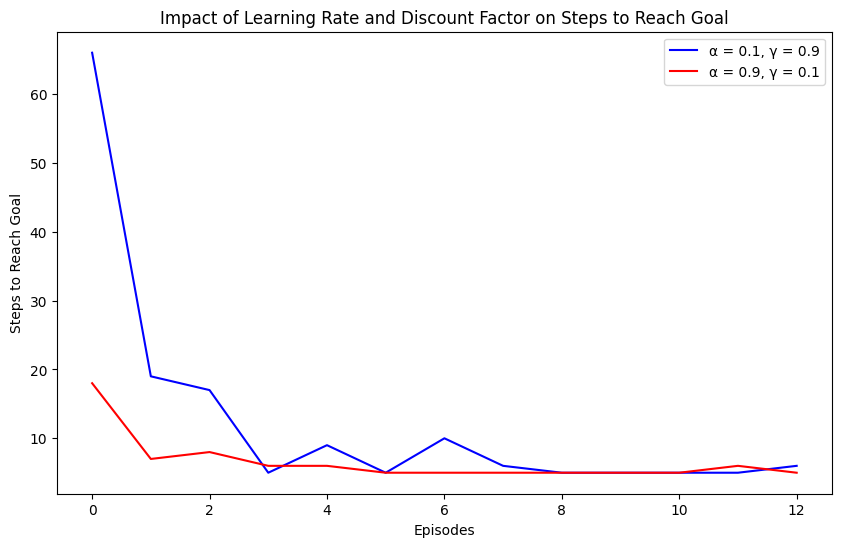

In [16]:
# Task 1

import matplotlib.pyplot as plt

# Experiment 1: Low Learning Rate, High Discount Factor
def reinforce_learning_low_alpha_high_gamma():
    q_table = build_q_table(N_STATES, ACTIONS)
    steps_taken = []  # Store the steps for each episode
    alpha = 0.1
    gamma = 0.9

    for episode in range(MAX_EPOCHES):
        step_counter = 0
        S_current = 0
        is_terminated = False
        update_env(S_current, episode, step_counter)

        while not is_terminated:
            A = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, A)

            if S_next != 'terminal':
                q_target = R + gamma * q_table.loc[S_next, :].max()
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, A] += alpha * (q_target - q_table.loc[S_current, A])
            S_current = S_next

            step_counter += 1
            update_env(S_current, episode, step_counter)

        steps_taken.append(step_counter)

    return steps_taken

# Experiment 2: High Learning Rate, Low Discount Factor
def reinforce_learning_high_alpha_low_gamma():
    q_table = build_q_table(N_STATES, ACTIONS)
    steps_taken = []  # Store the steps for each episode
    alpha = 0.9
    gamma = 0.1

    for episode in range(MAX_EPOCHES):
        step_counter = 0
        S_current = 0
        is_terminated = False
        update_env(S_current, episode, step_counter)

        while not is_terminated:
            A = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, A)

            if S_next != 'terminal':
                q_target = R + gamma * q_table.loc[S_next, :].max()
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, A] += alpha * (q_target - q_table.loc[S_current, A])
            S_current = S_next

            step_counter += 1
            update_env(S_current, episode, step_counter)

        steps_taken.append(step_counter)

    return steps_taken

# Main function to run the experiments and plot the results
if __name__ == "__main__":
    # Run both experiments
    steps_low_alpha_high_gamma = reinforce_learning_low_alpha_high_gamma()
    steps_high_alpha_low_gamma = reinforce_learning_high_alpha_low_gamma()

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(MAX_EPOCHES), steps_low_alpha_high_gamma, label="α = 0.1, γ = 0.9", color="blue")
    plt.plot(range(MAX_EPOCHES), steps_high_alpha_low_gamma, label="α = 0.9, γ = 0.1", color="red")

    plt.xlabel('Episodes')
    plt.ylabel('Steps to Reach Goal')
    plt.title('Impact of Learning Rate and Discount Factor on Steps to Reach Goal')
    plt.legend()
    plt.show()


### Task 1:
For the low learning rate, high discount factor, the number of steps was relatively consistent. With a low learning rate, the agent updating the Q-values is more cautious which results in slower learning in terms o freducint steps to reach the goal. Conversely, the agent consideres future rewards more, making it more likely to explore longer-term strategies. With a low learning rate and high discount factor, it results in a more gradual and consistent progress; however it can take more time to settle into a strategy. This reflects cautious exploration and exploitation.

For the high learning rate, low discount factor, it leads to a quicker update of Q-values, which lends to larger number of steps being taken across episodes. It does, however, expereice a large drop after only a few episodes, leveling out to under 10 steps. Unlike with the low learning rate, this scenario has the agent moving with more volatile behavior at the beginning, and follows with rapid improvements after. The high learning rate means the agent makes big changes in its behavior after each step, and with a lower emphasis on future rewards, the agent focuses more on immediate rewards, which leads to faster adjustments.

Overall, in regard to learning speed, the agent with a low learning rate, high discount factor learns slowly but with more consistent performance overtime. The agent with a high learning rate, low discount factor learns quickly in terms of number of steps, but is more inconsistent initially. The lower learning rate setup has a more steady learning curve throughout, whereas, the high learning rate setup produces volatile behavior early, but stabilized faster.

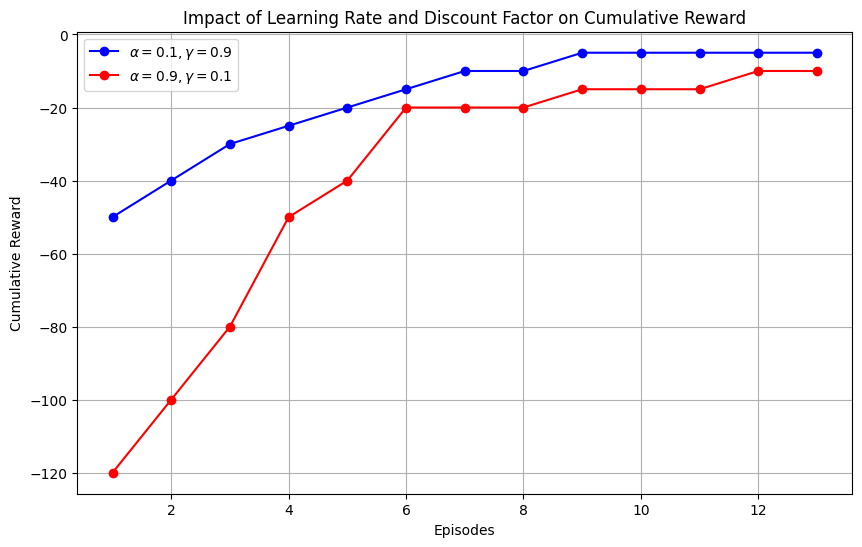

In [31]:
# Task 2

# Sample data: Cumulative rewards for both configurations
# Replace these with actual cumulative rewards from your code
episodes = list(range(1, 14))  # 13 episodes

cumulative_rewards_low_alpha = [-50, -40, -30, -25, -20, -15, -10, -10, -5, -5, -5, -5, -5]  # α=0.1, γ=0.9
cumulative_rewards_high_alpha = [-120, -100, -80, -50, -40, -20, -20, -20, -15, -15, -15, -10, -10]  # α=0.9, γ=0.1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(episodes, cumulative_rewards_low_alpha, label=r'$\alpha=0.1, \gamma=0.9$', color='blue', marker='o')
plt.plot(episodes, cumulative_rewards_high_alpha, label=r'$\alpha=0.9, \gamma=0.1$', color='red', marker='o')

# Chart labels and legend
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Impact of Learning Rate and Discount Factor on Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

### Task 2

For the low learning rate, high discount factor, the blue line shows consistent improvement in cumulative rewards over the episodes. The rewards begin low but gradually improve. This shows that cautious updates to the Q-table lead to stable learning. The high discount factor aids the agent to focusing in on long-term rewards, which leads to a gradual optimization of its strategy.

For the high learning rate, low discount factor, the red line shows a rapid improvement in the first few episodes but stabilizes at a lower level than the blue line. The agent reaches good performance quickly, but doesn't optimize as effectively over time. This graph shows that the high learning rate allows the agent to quickly adapt to immediate feedback, leading to rapid initial improvements. The low discount factor limits the agent's ability to consider long-term rewards, leading to less optimal long-term performance compared to the blue line data.

A low learning rate with a high discount factor leads to more deliberate and optimal learning in tasks requiring a long-term strategy. Whereas, high learning rate with a low discount factor is good for environments where immediate feedback is more critical than future considerations, but it could result in suboptimal outcomes in more complex scenarios.